# FAZENDO LIGAÇÃO COM GOOGLE SHEETS

In [3]:
import gspread
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import ydata_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import locale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import datetime as dt
from datetime import timedelta


In [4]:
#https://docs.google.com/spreadsheets/d/1cdpD3jyxZ8uBJpEd2Rw16V9hRgIujXUCygeZNfCjVYo/edit?usp=sharing
sheet_id='1cdpD3jyxZ8uBJpEd2Rw16V9hRgIujXUCygeZNfCjVYo'
xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
estoque = pd.read_excel(xls, 'ESTOQUE', header = 0)

In [5]:
#https://docs.google.com/spreadsheets/d/12wBT04bE19cIWz2FOWitjFjerKCS46KooCVz1ZpB97E/edit?usp=sharing
sheet_id2 ="12wBT04bE19cIWz2FOWitjFjerKCS46KooCVz1ZpB97E"
relatorios = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id2}/export?format=xlsx")
vendas = pd.read_excel(relatorios, 'Relatorio de Vendas', header=0)
custos_fixos = pd.read_excel(relatorios, 'Relatório de Custos Fixos', header=0)
custos_variaveis = pd.read_excel(relatorios, 'Relatorio Custos Variaveis', header=0)


In [6]:
# from __future__ import print_function
# import pickle
# import os.path
# from googleapiclient.discovery import build
# from google_auth_oauthlib.flow import InstalledAppFlow
# from google.auth.transport.requests import Request

# # If modifying these scopes, delete the file token.pickle.
# SCOPES = ['https://www.googleapis.com/auth/drive.metadata.readonly']

# def main():
#     """Shows basic usage of the Drive v3 API.
#     Prints the names and ids of the first 10 files the user has access to.
#     """
#     creds = None
#     # The file token.pickle stores the user's access and refresh tokens, and is
#     # created automatically when the authorization flow completes for the first
#     # time.
#     if os.path.exists('token.pickle'):
#         with open('token.pickle', 'rb') as token:
#             creds = pickle.load(token)
#     # If there are no (valid) credentials available, let the user log in.
#     if not creds or not creds.valid:
#         if creds and creds.expired and creds.refresh_token:
#             creds.refresh(Request())
#         else:
#             flow = InstalledAppFlow.from_client_secrets_file(
#                 'credenciais.json', SCOPES)
#             creds = flow.run_local_server(port=0)
#         # Save the credentials for the next run
#         with open('token.pickle', 'wb') as token:
#             pickle.dump(creds, token)

#     service = build('drive', 'v3', credentials=creds)

#     # Call the Drive v3 API
#     results = service.files().list(
#         pageSize=10, fields="nextPageToken, files(id, name)").execute()
#     items = results.get('files', [])

#     if not items:
#         print('No files found.')
#     else:
#         print('Files:')
#         for item in items:
#             print(u'{0} ({1})'.format(item['name'], item['id']))

# if __name__ == '__main__':
#     main()
    


# ESTOQUE

In [7]:
df_estoque=pd.DataFrame(estoque)

In [8]:
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Peça            384 non-null    object        
 1   Valor           384 non-null    float64       
 2   Valor da venda  384 non-null    float64       
 3   Ordem           384 non-null    int64         
 4   Data Da Compra  384 non-null    datetime64[ns]
 5   Tamanho         384 non-null    object        
 6   FORNECEDOR      384 non-null    object        
 7   MES/ANO         384 non-null    object        
 8   VENDIDA?        115 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.1+ KB


# PLANILHAS DE VENDAS E CUSTOS

In [9]:
df_custos_fixo=pd.DataFrame(custos_fixos)
df_custos_variaveis=pd.DataFrame(custos_variaveis)
df_receita = pd.DataFrame(vendas)

# CUSTOS FIXOS

In [10]:
df_custos_fixo.drop('Unnamed: 0', axis =1, inplace =True)
df_custos_fixo.drop(df_custos_fixo.index[0:14],inplace = True)


In [11]:
df_custos_fixo=df_custos_fixo.rename(columns={'Unnamed: 1':'Data','Unnamed: 2':'Item',
                                              'Unnamed: 3':'Parcelas','Unnamed: 4':'Quantidade',
                                              'Unnamed: 5':'Valor Total','Unnamed: 6':'Valor Mensal'
                                              ,'Unnamed: 7':'Mês','Unnamed: 8':'A VISTA'})

# CUSTOS VARIAVEIS

In [12]:
df_custos_variaveis.drop('Unnamed: 0',axis=1,inplace = True)
df_custos_variaveis.drop(df_custos_variaveis.index[0:14],inplace = True)
df_custos_variaveis=df_custos_variaveis.rename(columns={'Unnamed: 1':'Data','Unnamed: 2':'Item',
                                                        'Unnamed: 3':'Parcelas','Unnamed: 4':'Quantidade',
                                                        'Unnamed: 5':'Valor Total','Unnamed: 6':'Valor Mensal'
                                              ,'Unnamed: 7':'Mês','Unnamed: 8':'A VISTA'})

In [13]:
df_custos_variaveis

,Data,Item,Parcelas,Quantidade,Valor Total,Valor Mensal,Mês,A VISTA
14,2023-01-06 00:00:00,Mercadoria,1,110,3721,3721,1/2023,PAGO
15,2023-01-09 00:00:00,Mercadoria,1,32,1046.8,1046.8,1/2023,PAGO
16,2023-01-11 00:00:00,Mercadoria,1,32,1882,1882,1/2023,PAGO
17,2023-01-13 00:00:00,Mercadoria,1,15,770,770,1/2023,PAGO
18,2023-01-31 00:00:00,Mercadoria,1,15,480,480,1/2023,PAGO
19,2023-02-01 00:00:00,Mercadoria,1,31,1425,1425,2/2023,PAGO
20,2023-02-02 00:00:00,Mercadoria,1,63,2986,2986,2/2023,PAGO
21,2023-02-03 00:00:00,Mercadoria,1,48,1996,1996,2/2023,PAGO
22,2023-02-13 00:00:00,Mercadoria,1,38,747.2,747.2,2/2023,PAGO


#RECEITAS

In [14]:
df_receita.drop('Unnamed: 0',axis=1,inplace = True)
df_receita.drop(df_receita.index[0:14],inplace = True)
df_receita=df_receita.rename(columns={'Unnamed: 1':'Data','Unnamed: 2':'Peça',
                                      'Unnamed: 3':'Parcelas',
                                      'Unnamed: 4':'Cliente','Unnamed: 5':'Valor Total',
                                      'Unnamed: 6':'Ordem'
                                      ,'Unnamed: 7':'Tamanho','Unnamed: 8':'Valor Mensal',
                                      'Unnamed: 9':"Mês",'Unnamed: 10':"A Vista?"})

In [15]:
df_estoque['Valor']=pd.to_numeric(df_estoque['Valor'])
df_estoque['Valor da venda']=pd.to_numeric(df_estoque['Valor da venda'])
df_estoque['Vendas Realizadas']=df_estoque.loc[(df_estoque['VENDIDA?']=="VENDIDO"), ['Valor da venda']]


In [16]:
df_estoque=pd.merge(df_estoque,df_receita[['A Vista?','Mês','Data','Cliente','Ordem']].rename(columns={'Mês':'Data da Venda'}),how='left', on='Ordem')

In [17]:
df_estoque['VENDIDA?']=df_estoque['VENDIDA?'].fillna('Estoque')
df_estoque['Vendas Realizadas']=df_estoque['Vendas Realizadas'].fillna(0)
df_estoque['A Vista?']=df_estoque['A Vista?'].fillna("")
df_estoque['Data da Venda']=df_estoque['Data da Venda'].fillna('')
df_estoque['Cliente']=df_estoque['Cliente'].fillna('')

In [18]:
df_estoque=df_estoque[['Peça','Valor','Vendas Realizadas',
                       'Tamanho','FORNECEDOR','VENDIDA?','A Vista?','Data']].rename(columns={'Valor':'Valor comprado'})

In [19]:
df_estoque=df_estoque.query('`Vendas Realizadas`>0')

In [20]:
df_estoque['Data'] = pd.to_datetime(df_estoque['Data'])

In [21]:
media = df_estoque['Vendas Realizadas'].mean()
print("Média ", media)

Média  97.14170940170936


In [22]:
mediana = df_estoque['Vendas Realizadas'].median() 
print("Mediana ", mediana)

Mediana  95.0


In [23]:
df_estoque.loc[df_estoque['Data'].isnull() == True]

,Peça,Valor comprado,Vendas Realizadas,Tamanho,FORNECEDOR,VENDIDA?,A Vista?,Data


In [24]:
# #Avaliar o período dos dados coletados
inicio = pd.to_datetime(df_estoque['Data']).dt.date.min()
fim = pd.to_datetime(df_estoque['Data']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2023-01-19 Até: 2023-02-23


In [25]:
df_estoque.isnull().sum()

Peça                 0
Valor comprado       0
Vendas Realizadas    0
Tamanho              0
FORNECEDOR           0
VENDIDA?             0
A Vista?             0
Data                 0
dtype: int64

In [26]:
variaveis_numericas = []
for i in df_estoque.columns[0:48].tolist():
        if df_estoque.dtypes[i] == 'int64' or df_estoque.dtypes[i] == 'float64':            
            print(i, ':' , df_estoque.dtypes[i]) 
            variaveis_numericas.append(i)

Valor comprado : float64
Vendas Realizadas : float64


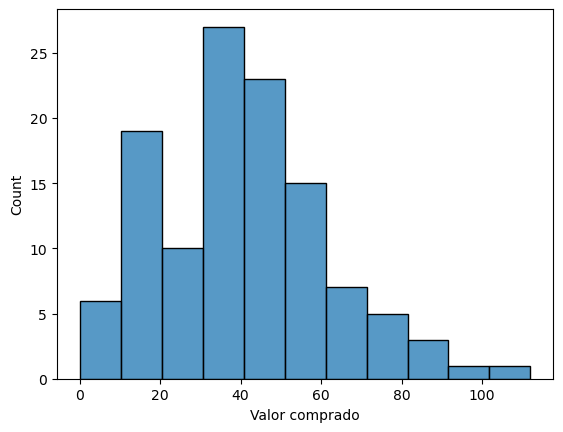

In [27]:
# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
sns.histplot(df_estoque['Valor comprado'])
plt.show()

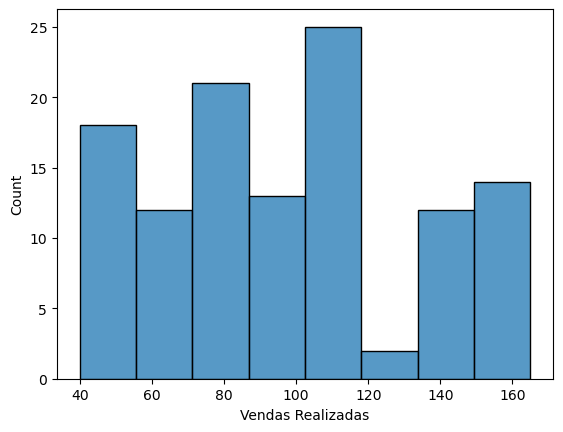

In [28]:
sns.histplot(df_estoque['Vendas Realizadas'])
plt.show()

In [29]:
df_estoque=df_estoque.rename(columns={'Data':'DATA_VENDA'})

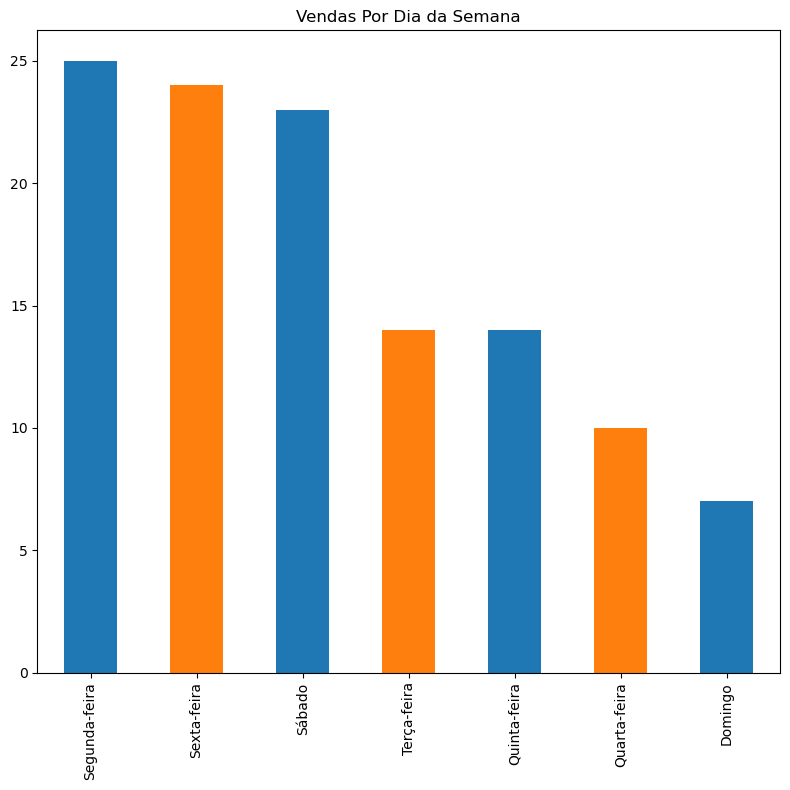

In [30]:
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

df_estoque['DATA_VENDA'] =  pd.to_datetime(df_estoque['DATA_VENDA'], format='%d/%m/%Y')
df_estoque['DATA_VENDA'] = df_estoque['DATA_VENDA'].dt.date
df_estoque['ANO_VENDA'] = pd.DatetimeIndex(df_estoque['DATA_VENDA']).year
df_estoque['MES_VENDA'] = pd.DatetimeIndex(df_estoque['DATA_VENDA']).month
df_estoque['DIA_VENDA'] = pd.DatetimeIndex(df_estoque['DATA_VENDA']).day
df_estoque['DIA_SEMANA_VENDA'] = pd.DatetimeIndex(df_estoque['DATA_VENDA']).day_name(locale = 'pt_BR.utf8')


plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
df_estoque.DIA_SEMANA_VENDA.value_counts().plot(kind='bar', title='Vendas Por Dia da Semana',color = ['#1F77B4', '#FF7F0E']);

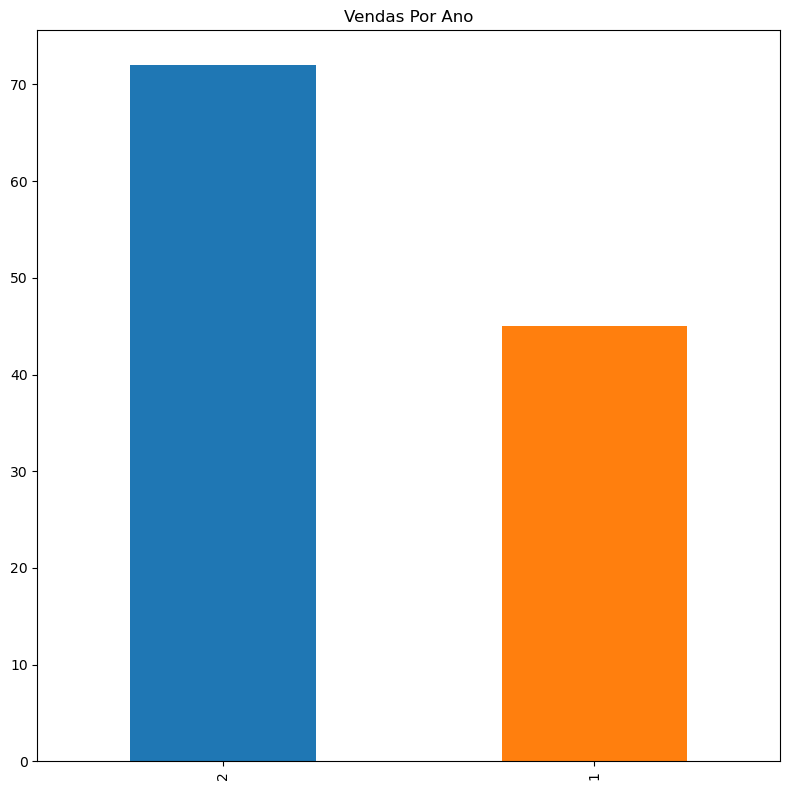

In [31]:
df_estoque.MES_VENDA.value_counts().plot(kind='bar', title='Vendas Por Ano',color = ['#1F77B4', '#FF7F0E']);

In [32]:
df=df_estoque.copy()

In [33]:
def define_peça(x):
    if 'CONJ' in x:
        x='CONJUNTO'
    elif 'CROPPED' in x :
        x='cropped'
    elif 'BLUSA' in x:
        x='Blusa'
    elif  'SHORT' in x:
        x='SHORT'
    elif 'VESTIDO' in x:
        x='Vestido'
    elif 'CALÇA' in x:
        x='Calça'
    elif 'REGAT' in x:
        x='Regata'
    elif 'TOP' in x:
        x='TOPPER'
    elif 'SAIA' in x:
        x='SAIA'
    else: 
        x='Outros'
    return x
df_estoque['Categoria de Peças'] = df_estoque['Peça'].str.upper().apply(define_peça)

In [34]:
df_estoque.drop(['Peça','VENDIDA?'],axis=1,inplace=True)

In [35]:
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1 to 350
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Valor comprado      117 non-null    float64
 1   Vendas Realizadas   117 non-null    float64
 2   Tamanho             117 non-null    object 
 3   FORNECEDOR          117 non-null    object 
 4   A Vista?            117 non-null    object 
 5   DATA_VENDA          117 non-null    object 
 6   ANO_VENDA           117 non-null    int64  
 7   MES_VENDA           117 non-null    int64  
 8   DIA_VENDA           117 non-null    int64  
 9   DIA_SEMANA_VENDA    117 non-null    object 
 10  Categoria de Peças  117 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 11.0+ KB


In [36]:
#Temos muitas faixas em quase todas as colunas, para melhorar o modelo,vamos criar algumas variavies categoricas para facilitar, tratar util linhas inseguras
bins =[-100,15,50]
labels= ['Até dia 15','Após dia 15']
df_estoque['Faixa_Parte_mês'] = pd.cut(df_estoque['DIA_VENDA'], bins=bins,labels=labels)
pd.value_counts(df_estoque.Faixa_Parte_mês)

Após dia 15    67
Até dia 15     50
Name: Faixa_Parte_mês, dtype: int64

In [37]:
df_estoque.drop(['DIA_VENDA','ANO_VENDA'], axis = 1, inplace =True)

In [38]:
df_estoque['Tamanho'] = df_estoque['Tamanho'].astype(str)

In [39]:
df_estoque['DATA_VENDA']=pd.to_datetime(df_estoque['DATA_VENDA'])

In [40]:
df_estoque.shape

(117, 10)

In [41]:
# Carregar vairiaveis categoricas, vamos somente retirar a variavel de inadimplente
variaveis_categoricas = []
for i in df_estoque.columns[0:10].tolist():
    if df_estoque.dtypes[i] == "object" or df_estoque.dtypes[i] == 'category':
        variaveis_categoricas.append(i)

In [42]:
lb= LabelEncoder()
for var in variaveis_categoricas:
    df_estoque[var] = lb.fit_transform(df_estoque[var])

In [43]:
df['DATA_VENDA'] = pd.to_datetime(df['DATA_VENDA'],format='%Y-%m-%d')



In [45]:

from statsmodels.tsa.arima.model import ARIMA

In [50]:
df_x=df.groupby('DATA_VENDA').agg({"Vendas Realizadas":'sum'}).reset_index()

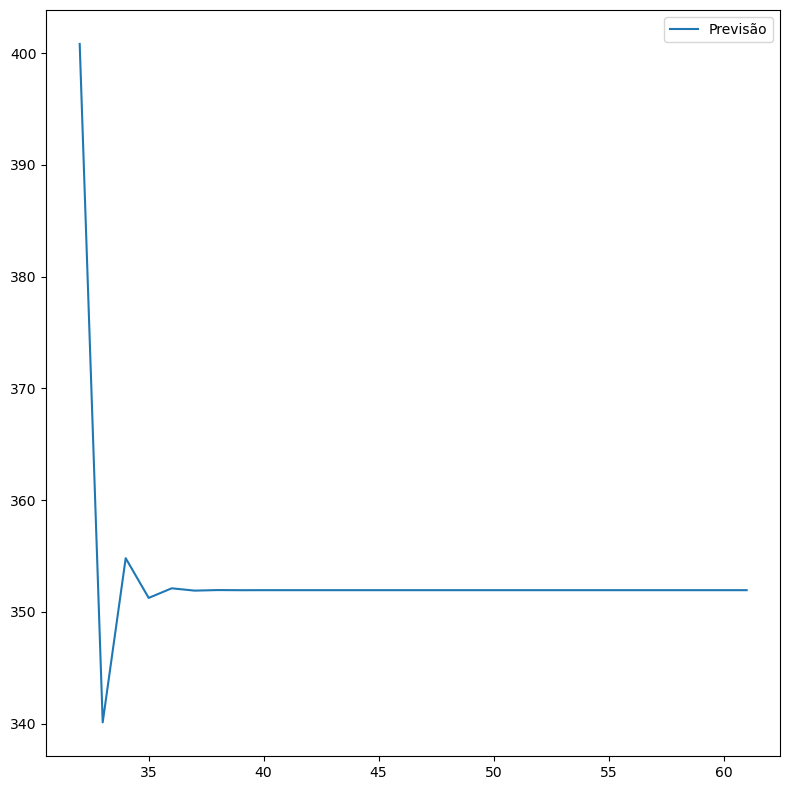

In [55]:
# criando uma série temporal a partir dos dados de vendas
sales_ts = pd.Series(df_x["Vendas Realizadas"].values, index=df_x["DATA_VENDA"])

# definindo a ordem do modelo ARIMA (p, d, q)
p, d, q = 1, 1, 1

# criando o modelo ARIMA e ajustando aos dados
arima_model = ARIMA(sales_ts, order=(p, d, q))
arima_result = arima_model.fit()

# fazendo a previsão para os próximos 30 dias
forecast = arima_result.forecast(steps=30)

# plotando os resultados

plt.plot(forecast.index, forecast.values, label="Previsão")
plt.legend()
plt.show()

In [64]:
# gerando um índice de datas para a previsão
forecast_index = pd.date_range(sales_ts.index[-1], periods=30, freq="d")

# adicionando a previsão ao dataframe original
sales_data_forecast = sales_ts.append(pd.Series(forecast.values, index=forecast_index))

In [65]:
sales_data_forecast

2023-01-19     994.900000
2023-01-20     117.120000
2023-01-21    1189.800000
2023-01-22     159.800000
2023-01-23      85.000000
2023-01-24     234.800000
2023-01-26     110.000000
2023-01-27     329.900000
2023-01-28     484.900000
2023-01-29      79.800000
2023-01-30     220.000000
2023-01-31     560.000000
2023-02-01     130.400000
2023-02-04     254.240000
2023-02-06     346.700000
2023-02-07      69.900000
2023-02-08     425.000000
2023-02-09     110.000000
2023-02-10    1608.010000
2023-02-11     380.000000
2023-02-12     195.000000
2023-02-13     807.110000
2023-02-14     189.900000
2023-02-15     210.000000
2023-02-16      89.900000
2023-02-17     399.900000
2023-02-18     354.000000
2023-02-19      79.900000
2023-02-20     809.800000
2023-02-21      79.900000
2023-02-22     110.000000
2023-02-23     149.900000
2023-02-23     400.834464
2023-02-24     340.115145
2023-02-25     354.807570
2023-02-26     351.252402
2023-02-27     352.112656
2023-02-28     351.904498
2023-03-01  

In [44]:
profile = ProfileReport(df_estoque, title ='Estoque Shop Maria Dondoca', html ={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file(output_file="Vendas.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]